#***MACHINE LEARNING MTECH PROJECT: HEALTH INSURANCE COST PREDICTION ***

> Members:
1. Aishwarya V - CB.EN.P2CSE2201
2. Mahakaleshwar P - CB.EN.P2CSE22007 
3. Venkatraman Ranganath - CB.EN.P2AIE22011

About the project:

Health insurance is a necessity for every individual.The insurance offered varies from company to company because the importance given to few features are different from one another.


The aim of this project is to create an understanding of the prediction of the amount required for an individual based on their health.




Dataset Information:

Dimensions of Dataset: 1338 rows , 7 features
Features:

1.   age - Age of the person
2.   sex - Sex of the person
3.   bmi - Body mass Index of the person
4.   children - Number of children for the  person
5.   smoker - Does the person smoke?
6.   region - The region, the person is based of
7.   Charges - Medical Insurance per year for the person

# IMPORTING THE NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#IMPORTING THE DATASET

In [ ]:
df = pd.read_csv('/content/sample_data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EXPLORATORY DATA ANALYSIS

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Providing information details such as data type and if it is not null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# The dataset has an almost equal proportion of both the genders stating the balance of data based on gender
df['sex'].value_counts().sort_values()

female    662
male      676
Name: sex, dtype: int64

In [ ]:
# The count of number of children arranged in ascending order
df['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

In [ ]:
df['smoker'].value_counts().sort_values()

yes     274
no     1064
Name: smoker, dtype: int64

In [ ]:
df['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

# GRAPHS FOR ATTRIBUTE VS TARGET

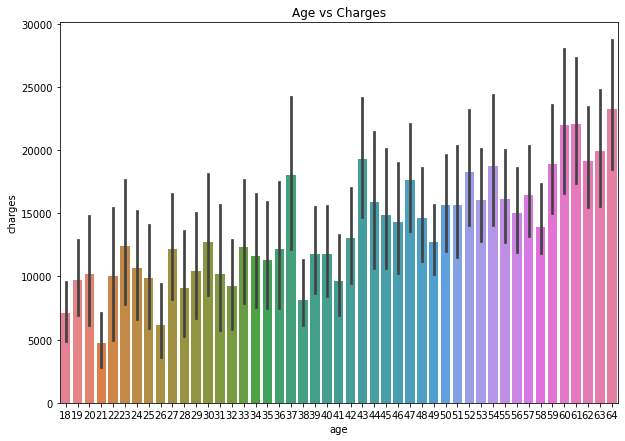

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Age vs Charges')
sns.barplot(x='age',y='charges',data=df,palette='husl')
plt.savefig('/content/sample_data/AgevsCharges')

##Inference: We see that as age increases, the medical insurance cost also increases

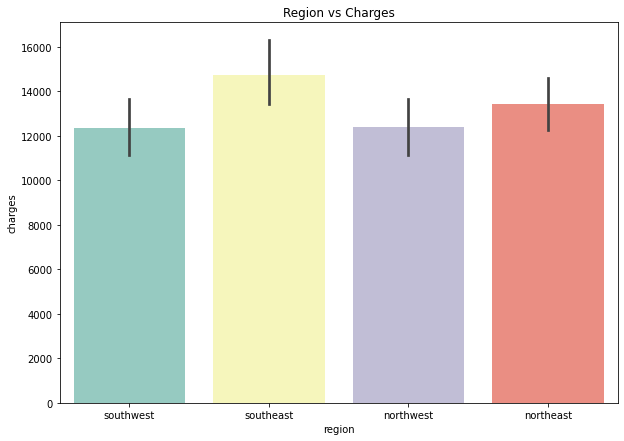

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charges')
sns.barplot(x='region',y='charges',data=df,palette='Set3')
plt.savefig('/content/sample_data/RegionvsCharges')

#Inference: People in tbe south east region, have more medical insurance charges.

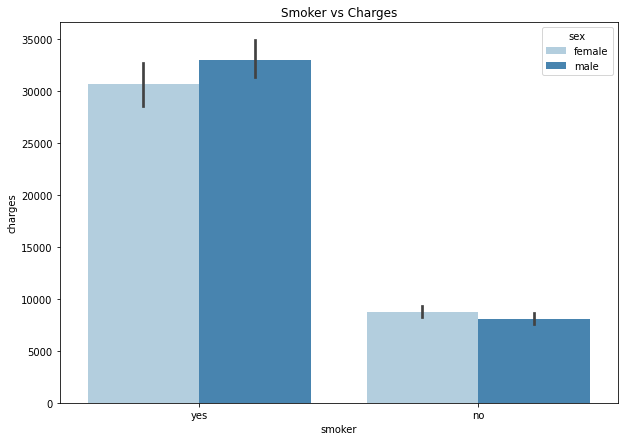

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charges')
sns.barplot(x='smoker',y='charges',data=df,palette='Blues',hue='sex')
plt.savefig('/content/sample_data/SmokervsCharges')

#Inference: Smokers irrespective of gender have more medical insurance charges

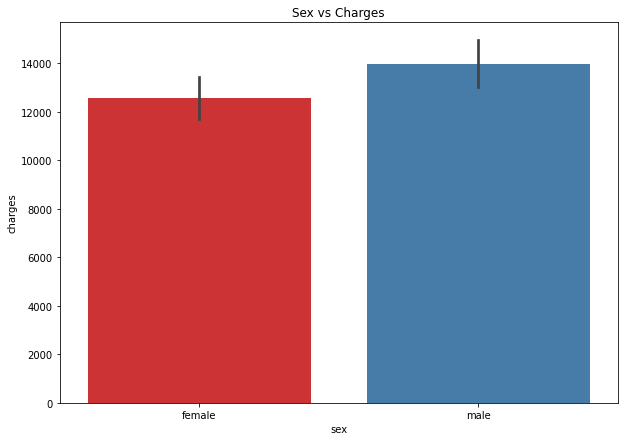

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=df,palette='Set1')
plt.savefig('/content/sample_data/SexvsCharges')

# Inference: Males tend to have more medical insurance charges compared to females.

#DATA PREPROCESSING

##1. DELETING NULL VALUES

In [ ]:
# The dataset considered is a pure dataset
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###Inference:  There are no null values in the dataset

## 2. CONVERT CATEGORICAL VALUES INTO NUMERICAL

In [ ]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
df_copy = df.copy()
df_copy.replace(clean_data, inplace=True)
df_copy

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


#CORRELATION MATRIX

### A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. 
### A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

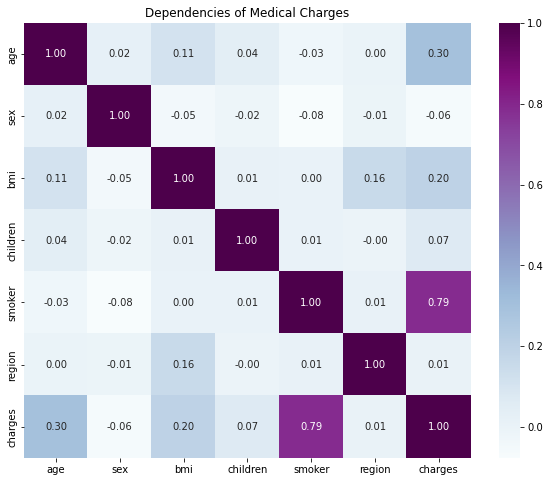

In [ ]:
corr = df_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('/content/sample_data/Correlation')
plt.show()

### Smoker, BMI and Age are the most important factors that influence the target variable

### Sex, Region and Children do not affect the target variable that much.

## 3. SKEW PLOTS , OUTLIER REMOVAL AND SCALING

In [ ]:
print('Printing Skewness for all columns')
print()
for col in list(df_copy.columns):
    print('{0} : Skewness {1:.3f}'.format(col,df_copy[col].skew()))


Printing Skewness for all columns

age : Skewness 0.056
sex : Skewness 0.021
bmi : Skewness 0.284
children : Skewness 0.938
smoker : Skewness 1.465
region : Skewness -0.038
charges : Skewness 1.516


## PLOT FOR AGE

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


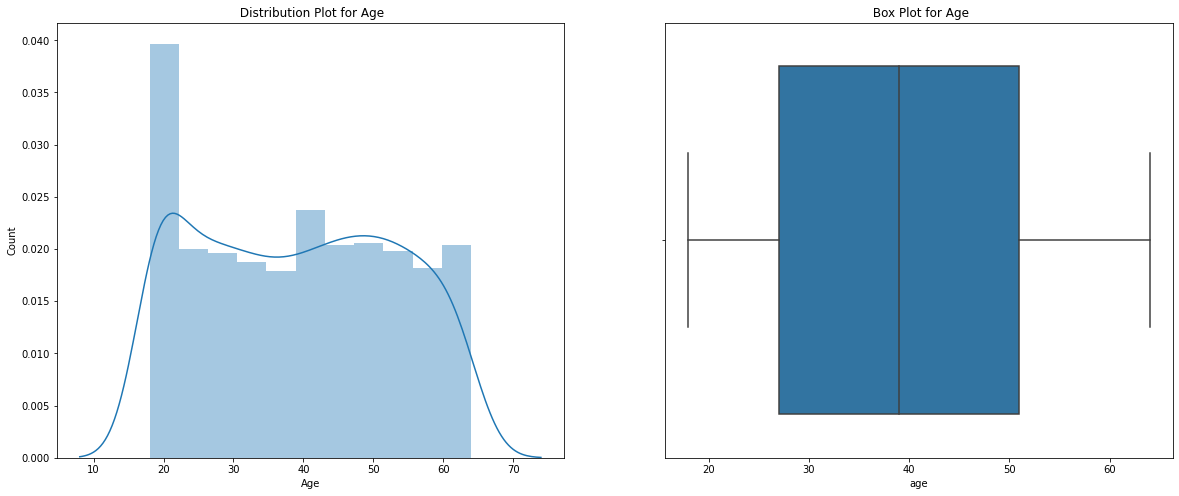

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df_copy['age'])
plt.title(' Distribution Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.subplot(1,2,2)
sns.boxplot(df_copy['age'])
plt.title(' Box Plot for Age')
plt.show()

## PLOT FOR BMI

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


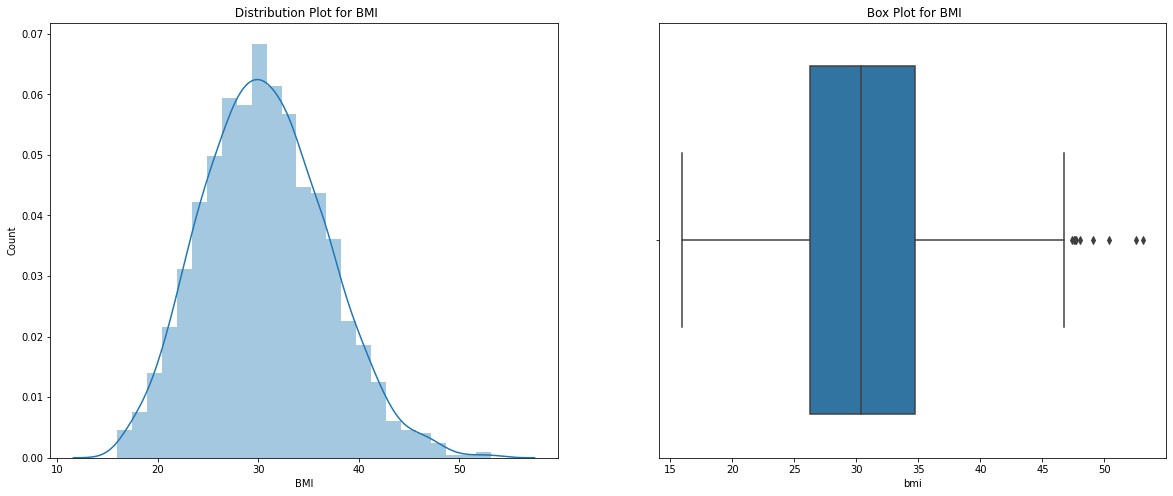

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df_copy['bmi'])
plt.title(' Distribution Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.subplot(1,2,2)
sns.boxplot(df_copy['bmi'])
plt.title(' Box Plot for BMI')
plt.show()

## PLOT FOR CHARGES

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


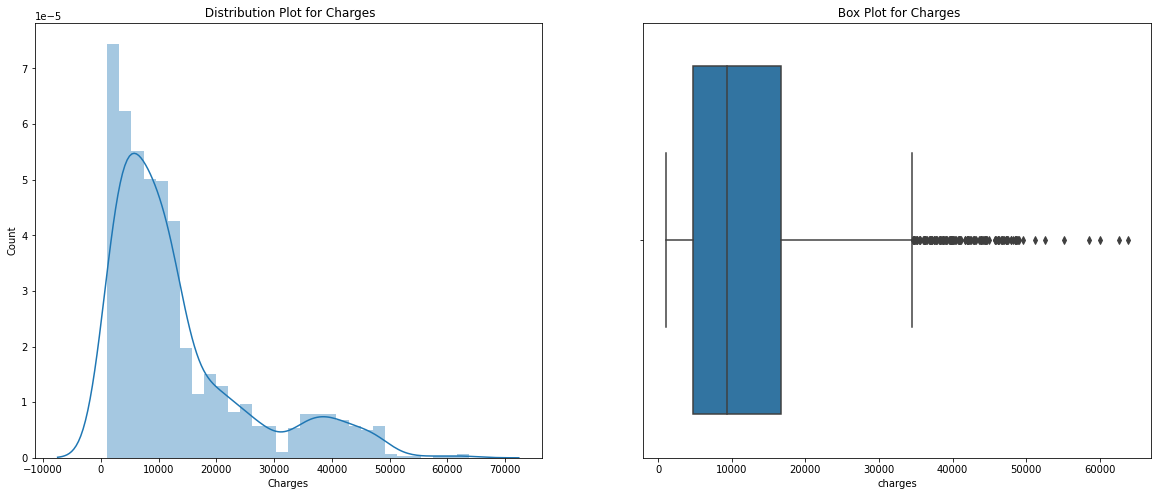

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df_copy['charges'])
plt.title(' Distribution Plot for Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.subplot(1,2,2)
sns.boxplot(df_copy['charges'])
plt.title(' Box Plot for Charges')
plt.show()

# OUTLIER REMOVAL AND SCALING

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
data_pre = df_copy.copy()

## ROBUST SCALER

In [ ]:
tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = RobustScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = RobustScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = RobustScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-0.833333,1,-0.297708,0,1,3,0.630515
1,-0.875000,0,0.401310,1,0,2,-0.643422
2,-0.458333,0,0.309616,3,0,2,-0.414515
3,-0.250000,0,-0.916344,0,0,0,1.059062
4,-0.291667,0,-0.181006,0,0,0,-0.463475


## STANDARD SCALER

In [ ]:
tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


# REGRESSION MODELS

## IMPORTING LIBRARIES

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

## TRAIN TEST SPLIT

In [ ]:
X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


##1. LINEAR REGRESSION


In [ ]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

y_pred_test = linreg_model.predict(X_test)

In [ ]:
#Cross Validation Score
#cv_linear_reg = cross_val_score(estimator = linreg_model, X = X, y = y, cv = 10)

#R2 Score for training data
y_pred_train = linreg_model.predict(X_train)
r2_score_train_linear = r2_score(y_train, y_pred_train)

#R2 Score for testing data
y_pred_test = linreg_model.predict(X_test)
r2_score_test_linear = r2_score(y_test, y_pred_test)

#Root mean squared error
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (Train Accuracy) : {0:.3f}'.format(r2_score_train_linear))
print('R2_score (Test Accuracy) : {0:.3f}'.format(r2_score_test_linear))
print('RMSE : {0:.3f}'.format(rmse_linear))

R2_score (Train Accuracy) : 0.741
R2_score (Test Accuracy) : 0.783
RMSE : 0.480


## 2.SUPPORT VECTOR REGRESSION



In [ ]:
svr_model = SVR(kernel='rbf')

svr_model.fit(X_train,y_train.ravel())

y_pred_test = svr_model.predict(X_test)

In [ ]:
#Cross Validation Score
#cv_linear_reg = cross_val_score(estimator = linreg_model, X = X, y = y, cv = 10)

#R2 Score for training data
y_pred_train = svr_model.predict(X_train)
r2_score_train_svr = r2_score(y_train, y_pred_train)

#R2 Score for testing data
y_pred_test = svr_model.predict(X_test)
r2_score_test_svr = r2_score(y_test, y_pred_test)

#Root mean squared error
rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (Train Accuracy) : {0:.3f}'.format(r2_score_train_svr))
print('R2_score (Test Accuracy) : {0:.3f}'.format(r2_score_test_svr))
print('RMSE : {0:.3f}'.format(rmse_svr))

R2_score (Train Accuracy) : 0.839
R2_score (Test Accuracy) : 0.846
RMSE : 0.404


### **HYPERPARAMETER TUNING FOR SVR**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svr = SVR()

parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }

svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)

svr_grid.fit(X_train, y_train.ravel())

svr = SVR(C=100, gamma=0.01, kernel = 'rbf', tol=0.0001)
svr.fit(X_train, y_train.ravel())

print("Best hyper parameters: ",svr_grid.best_params_)
print("Best score: ",svr_grid.best_score_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best hyper parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf', 'tol': 0.0001}
Best score:  0.8280129637897294


In [ ]:
#cv_svr = svr_grid.best_score_

y_pred_train = svr.predict(X_train)
r2_score_train = r2_score(y_train, y_pred_train)

y_pred_test = svr.predict(X_test)
r2_score_test = r2_score(y_test, y_pred_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (train) : {0:.3f}'.format(r2_score_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

R2_score (train) : 0.839
R2 score (test) : 0.868
RMSE : 0.374


## 3. RIDGE REGRESSION

In [ ]:
ridge_model = Ridge(alpha=1)

ridge_model.fit(X_train,y_train)

y_pred_test = ridge_model.predict(X_test)

In [ ]:
#Cross Validation Score
#cv_linear_reg = cross_val_score(estimator = linreg_model, X = X, y = y, cv = 10)

#R2 Score for training data
y_pred_train = ridge_model.predict(X_train)
r2_score_train_ridge = r2_score(y_train, y_pred_train)

#R2 Score for testing data
y_pred_test = ridge_model.predict(X_test)
r2_score_test_ridge = r2_score(y_test, y_pred_test)

#Root mean squared error
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (Train Accuracy) : {0:.3f}'.format(r2_score_train_ridge))
print('R2_score (Test Accuracy) : {0:.3f}'.format(r2_score_test_ridge))
print('RMSE : {0:.3f}'.format(rmse_ridge))

R2_score (Train Accuracy) : 0.741
R2_score (Test Accuracy) : 0.782
RMSE : 0.480


### **HYPERPARAMETER TUNING FOR RIDGE REGRESSION**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

steps = [ ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge())]

ridge_pipe = Pipeline(steps)

In [ ]:
parameters = { 'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,2,5,10,20,25,35, 43,55,100], 
               'model__random_state' : [42]}

reg_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
reg_ridge = reg_ridge.fit(X_train, y_train.ravel())

print("Best hyper parameters: ",reg_ridge.best_params_)
print("Best score: ",reg_ridge.best_score_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.25803e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.14414e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.16968e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Best hyper parameters:  {'model__alpha': 20, 'model__random_state': 42}
Best score:  0.8259990140429396


In [ ]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(X_train, y_train.ravel())

cv_ridge = reg_ridge.best_score_

y_pred_ridge_train = ridge.predict(X_train)
r2_score_train = r2_score(y_train, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(X_test)
r2_score_test = r2_score(y_test, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2 score (train) : {0:.3f}'.format(r2_score_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_test))
print('RMSE : {0:.3f}'.format(rmse_ridge))

R2 score (train) : 0.735
R2 score (test) : 0.772
RMSE : 0.480


## 4. RANDOM FOREST REGRESSOR

In [ ]:
random_model = RandomForestRegressor(n_estimators = 100)

random_model.fit(X_train,y_train.ravel())

y_pred_test = random_model.predict(X_test)

In [ ]:
#Cross Validation Score
#cv_linear_reg = cross_val_score(estimator = linreg_model, X = X, y = y, cv = 10)

#R2 Score for training data
y_pred_train = random_model.predict(X_train)
r2_score_train_random = r2_score(y_train, y_pred_train)

#R2 Score for testing data
y_pred_test = random_model.predict(X_test)
r2_score_test_random = r2_score(y_test, y_pred_test)

#Root mean squared error
rmse_random = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (Train Accuracy) : {0:.3f}'.format(r2_score_train_random))
print('R2_score (Test Accuracy) : {0:.3f}'.format(r2_score_test_random))
print('RMSE : {0:.3f}'.format(rmse_random))

R2_score (Train Accuracy) : 0.975
R2_score (Test Accuracy) : 0.862
RMSE : 0.382


## 5. DECISION TREE REGRESSION

In [ ]:
dectree_model = DecisionTreeRegressor()
dectree_model.fit(X_train, y_train)

y_pred_test = dectree_model.predict(X_test)

In [ ]:
#R2 Score for training data
y_pred_train = dectree_model.predict(X_train)
r2_score_train_dec = r2_score(y_train, y_pred_train)

#R2 Score for testing data
y_pred_test = dectree_model.predict(X_test)
r2_score_test_dec = r2_score(y_test, y_pred_test)

#Root mean squared error
rmse_dectree = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (Train Accuracy) : {0:.3f}'.format(r2_score_train_dec))
print('R2_score (Test Accuracy) : {0:.3f}'.format(r2_score_test_dec))
print('RMSE : {0:.3f}'.format(rmse_dectree))

R2_score (Train Accuracy) : 0.998
R2_score (Test Accuracy) : 0.754
RMSE : 0.510


#RESULTS

In [ ]:
models = [('Linear Regression', rmse_linear, r2_score_train_linear, r2_score_test_linear),
          ('Ridge Regression', rmse_ridge, r2_score_train_ridge, r2_score_test_ridge),
          ('Support Vector Regression', rmse_svr, r2_score_train_svr, r2_score_test_svr),
          ('Random Forest Regression', rmse_random, r2_score_train_random, r2_score_test_random),   
          ('Decision Tree Regression', rmse_dectree, r2_score_train_dec, r2_score_test_dec),
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test)
0,Linear Regression,0.479808,0.741410,0.782694
1,Ridge Regression,0.480101,0.741390,0.782429
2,Support Vector Regression,0.373936,0.838621,0.845907
3,Random Forest Regression,0.381735,0.975163,0.862450
4,Decision Tree Regression,0.510384,0.998308,0.754116


<BarContainer object of 5 artists>

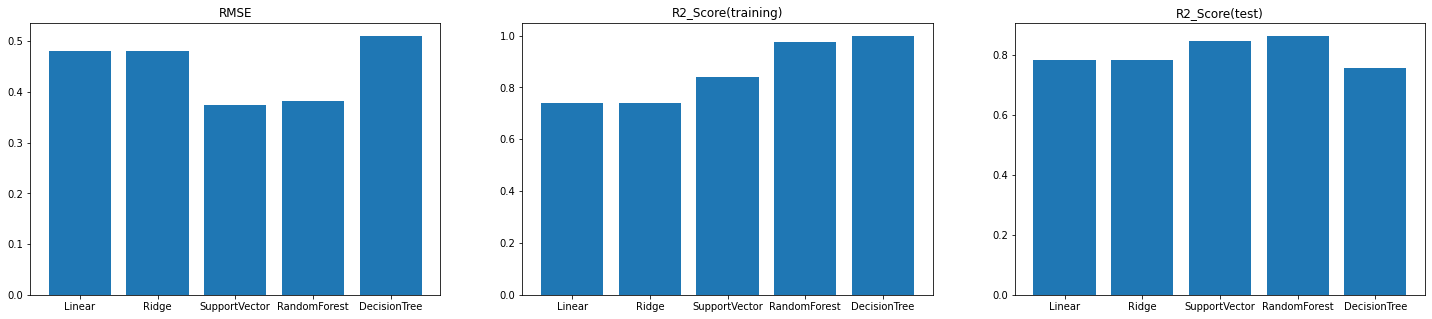

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Xval = np.array(["Linear","Ridge","SupportVector","RandomForest","DecisionTree"])
plt.figure(figsize=(25,5))
plt.subplot(131).set_title("RMSE")
plt.bar(Xval,predict.RMSE)
plt.subplot(132).set_title("R2_Score(training)")
plt.bar(Xval,predict['R2_Score(training)'])
plt.subplot(133).set_title("R2_Score(test)")
plt.bar(Xval,predict['R2_Score(test)'])

#Inference: Based on the results of RMSE, R2 TRAIN score, R2 TEST score we can say that Random Forest Regressor is the best model.